### Alejandro de Nicolás Gómez

## IMPORTS

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

## EX 1

In [14]:
#COINMARKETCAP - páxina de información sobre criptomonedas
#https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyMap

In [31]:
url1 = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters1 = {'start':'1','limit':'100','convert':'USD'}
headers1 = {'X-CMC_PRO_API_KEY': '417b1307-1fea-4f07-9de3-924cc3e0eb49'}
response1 = requests.get(url1, params=parameters1, headers=headers1)

In [101]:
#PREZO DAS PRIMEIRAS 10 CRIPTODIVISAS

In [123]:
for i in range(0,11):
    print (response1.json()['data'][i]['name'],
           "-",
           response1.json()['data'][i]['quote']['USD']['price'],
           "$")

Bitcoin - 42148.05010635906 $
Ethereum - 3213.4519331904576 $
BNB - 475.6937341315731 $
Tether - 1.0002313228206607 $
Cardano - 1.5409793697686998 $
USD Coin - 0.9995983757058111 $
Solana - 139.2682076890182 $
XRP - 0.7622753658585572 $
Terra - 78.66987761309971 $
Polkadot - 25.69611814851707 $
Dogecoin - 0.17136244340406315 $


In [108]:
url2 = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters2 = {'start':'1','limit':'100','convert':'EUR'}
headers2 = {'X-CMC_PRO_API_KEY': '417b1307-1fea-4f07-9de3-924cc3e0eb49'}
response2 = requests.get(url2, params=parameters2, headers=headers2)

In [109]:
#PREZO ACTUAL EN EUROS E SIMBOLO DO DOGECOIN

In [120]:
for i in range(0,len(response2.json()['data'])):
    if response2.json()['data'][i]['name'] == 'Dogecoin':
        print(response2.json()['data'][i]['symbol'],
              "-", 
              response2.json()['data'][i]['quote']['EUR']['price'],
              "€")

DOGE - 0.15029068770869006 €


In [64]:
#LOGO (EN IMAXE) E PAXINA DO DOGECOIN E BITCOIN (BTC) UTILIZANDO OS SEU SIMBOLOS PARA O REQUEST

In [6]:
url3 = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/info'
parameters3 = {'symbol':'DOGE,BTC'}
headers3 = {'X-CMC_PRO_API_KEY': '417b1307-1fea-4f07-9de3-924cc3e0eb49'}
response3 = requests.get(url3, params=parameters3, headers=headers3)

In [128]:
from IPython import display

https://bitcoin.org/


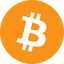

In [129]:
print (response3.json()['data']['BTC']['urls']['website'][0])
display.Image(response3.json()['data']['BTC']['logo'])

http://dogecoin.com/


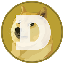

In [131]:
print (response3.json()['data']['DOGE']['urls']['website'][0])
display.Image(response3.json()['data']['DOGE']['logo'])

In [ ]:
#NOVO REQUEST PARA VER OS FIAT ORDENADOS POR ORDE ALFABETICA

In [26]:
url4 = 'https://pro-api.coinmarketcap.com/v1/fiat/map'
parameters4 = {'sort':'name'}
headers4 = {'X-CMC_PRO_API_KEY': '417b1307-1fea-4f07-9de3-924cc3e0eb49'}
response4 = requests.get(url4, headers=headers4, params=parameters4)

In [29]:
for i in range(0,len(response4.json()['data'])):
    print(response4.json()['data'][i]['name'],"(", response4.json()['data'][i]['symbol'],")")

Albanian Lek ( ALL )
Algerian Dinar ( DZD )
Argentine Peso ( ARS )
Armenian Dram ( AMD )
Australian Dollar ( AUD )
Azerbaijani Manat ( AZN )
Bahraini Dinar ( BHD )
Bangladeshi Taka ( BDT )
Belarusian Ruble ( BYN )
Bermudan Dollar ( BMD )
Bolivian Boliviano ( BOB )
Bosnia-Herzegovina Convertible Mark ( BAM )
Brazilian Real ( BRL )
Bulgarian Lev ( BGN )
Cambodian Riel ( KHR )
Canadian Dollar ( CAD )
Chilean Peso ( CLP )
Chinese Yuan ( CNY )
Colombian Peso ( COP )
Costa Rican Colón ( CRC )
Croatian Kuna ( HRK )
Cuban Peso ( CUP )
Czech Koruna ( CZK )
Danish Krone ( DKK )
Dominican Peso ( DOP )
Egyptian Pound ( EGP )
Euro ( EUR )
Georgian Lari ( GEL )
Ghanaian Cedi ( GHS )
Guatemalan Quetzal ( GTQ )
Honduran Lempira ( HNL )
Hong Kong Dollar ( HKD )
Hungarian Forint ( HUF )
Icelandic Króna ( ISK )
Indian Rupee ( INR )
Indonesian Rupiah ( IDR )
Iranian Rial ( IRR )
Iraqi Dinar ( IQD )
Israeli New Shekel ( ILS )
Jamaican Dollar ( JMD )
Japanese Yen ( JPY )
Jordanian Dinar ( JOD )
Kazakhstani 

In [65]:
#DATAFRAME SINXELO CO NOME, SIMBOLO E RANGO EN CMC DE DOGECOIN E BITCOIN XUNTOS

In [63]:
data1 = {'Name':response1.json()['data'][0]['name'],
         'Symbol':response1.json()['data'][0]['symbol'],
         'Rank':response1.json()['data'][0]['cmc_rank']}
data2 = {'Name':response1.json()['data'][10]['name'],
         'Symbol':response1.json()['data'][10]['symbol'],
         'Rank':response1.json()['data'][10]['cmc_rank']}

df1 = pd.DataFrame(data1,columns=['Name','Symbol','Rank'],index=[0])
df2 = pd.DataFrame(data2,columns=['Name','Symbol','Rank'],index=[0])

df_concat = pd.concat([df1, df2], ignore_index=True)
df_concat

{'Name': 'Bitcoin', 'Symbol': 'BTC', 'Rank': 1}
{'Name': 'Dogecoin', 'Symbol': 'DOGE', 'Rank': 11}


,Name,Symbol,Rank
0,Bitcoin,BTC,1
1,Dogecoin,DOGE,11


## EX 2

In [ ]:
#Dungeons and Dragons - páxina con información sobre o xogo de rol
#https://www.dnd5eapi.co/docs/

In [ ]:
#INDICES DOS ATRIBUTOS QUE PODEN TER AS PERSONAXES

In [92]:
url6='https://www.dnd5eapi.co/api/ability-scores/'
response6 = requests.get(url6)
for i in response6.json()['results']:
    print (i['index'])

cha
con
dex
int
str
wis


In [ ]:
#SABENDO OS INDICES, NOME E DESCRIPCION DOS ATRIBUTOS

In [105]:
for i in response6.json()['results']:
    url7='https://www.dnd5eapi.co/api/ability-scores/'+i['index']
    response7 = requests.get(url7)
    print(response7.json()['full_name'],"(", response7.json()['index'],"):", response7.json()['desc'][0])
    print("")

Charisma ( cha ): Charisma measures your ability to interact effectively with others. It includes such factors as confidence and eloquence, and it can represent a charming or commanding personality.

Constitution ( con ): Constitution measures health, stamina, and vital force.

Dexterity ( dex ): Dexterity measures agility, reflexes, and balance.

Intelligence ( int ): Intelligence measures mental acuity, accuracy of recall, and the ability to reason.

Strength ( str ): Strength measures bodily power, athletic training, and the extent to which you can exert raw physical force.

Wisdom ( wis ): Wisdom reflects how attuned you are to the world around you and represents perceptiveness and intuition.



In [ ]:
#COMPROBA OS HEADERS E O SERVIDOR DA API

In [106]:
response6.headers

{'Server': 'Cowboy', 'Connection': 'keep-alive', 'X-Powered-By': 'Express', 'Access-Control-Allow-Origin': '*', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '389', 'Etag': 'W/"185-L9GLOAFeR6+LRbDFqK5SmulaYl0"', 'Date': 'Tue, 18 Jan 2022 12:02:05 GMT', 'Via': '1.1 vegur'}

In [110]:
response6.headers['Server']

'Cowboy'

In [ ]:
#ENTRE CANTAS PROFICIENCIES PODEN ELIXIR AS PERSOAXES

In [135]:
url9 = 'https://www.dnd5eapi.co/api/proficiencies/'
response9 = requests.get(url9)
response9.json()['count']

117

In [ ]:
#QUE CLASES PODEN UTILIZAR A PROFICIENCY 'light-armor'

In [153]:
url10 = 'https://www.dnd5eapi.co/api/proficiencies/light-armor'
response10 = requests.get(url10)
for i in range (0, len(response10.json())):
    print(response10.json()['classes'][i]['name'])

Barbarian
Bard
Cleric
Druid
Ranger
Rogue
Warlock
